In [248]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [249]:
data = pd.read_csv('./ames_housing_train.csv', index_col='Id')

# Target

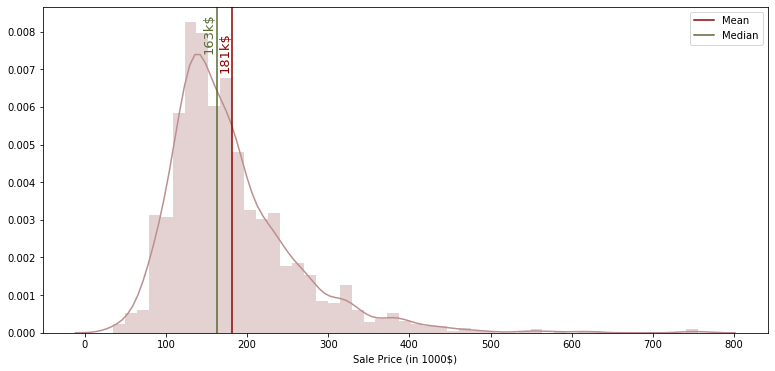

In [252]:
plt.figure(figsize=(13,6))

sns.distplot(data["SalePrice"]/1000, color = 'rosybrown')
plt.xlabel("Sale Price (in 1000$)")

mean = data['SalePrice'].mean()/1000
median = data['SalePrice'].median()/1000

plt.axvline(mean, color = 'darkred', label = 'Mean')
plt.axvline(median, color = 'darkolivegreen', label = 'Median')
plt.text(165,0.0070, "{}k$".format(round(mean)), color = 'darkred', rotation = 90, size = 13)
plt.text(145,0.0075, "{}k$".format(round(median)), color = 'darkolivegreen', rotation = 90, size = 13)
plt.legend()

# Missing Values
**Here our goal is to identify columns with missing values and get a sense of how much data is missing from our dataset**

In [253]:
# How much missing data do we have?
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent Missing'])
missing_data.head(20)

,Total,Percent Missing
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


### We want to visualize the counts of values in columns, where we have mising values. In the graphs below, the counts of NaNs are always shown first

## Categorical Values

In [181]:
cat_cols = [cname for cname in data.columns if data[cname].dtype == "object"]
cat_with_nans = [cname for cname in data.columns if data[cname].dtype == "object" and data[cname].isnull().any()]
print('there are', len(cat_with_nans), 'columns with missing categorical data:', cat_with_nans)

there are 16 columns with missing categorical data: ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [182]:
data[cat_cols] = data[cat_cols].fillna("MISS")

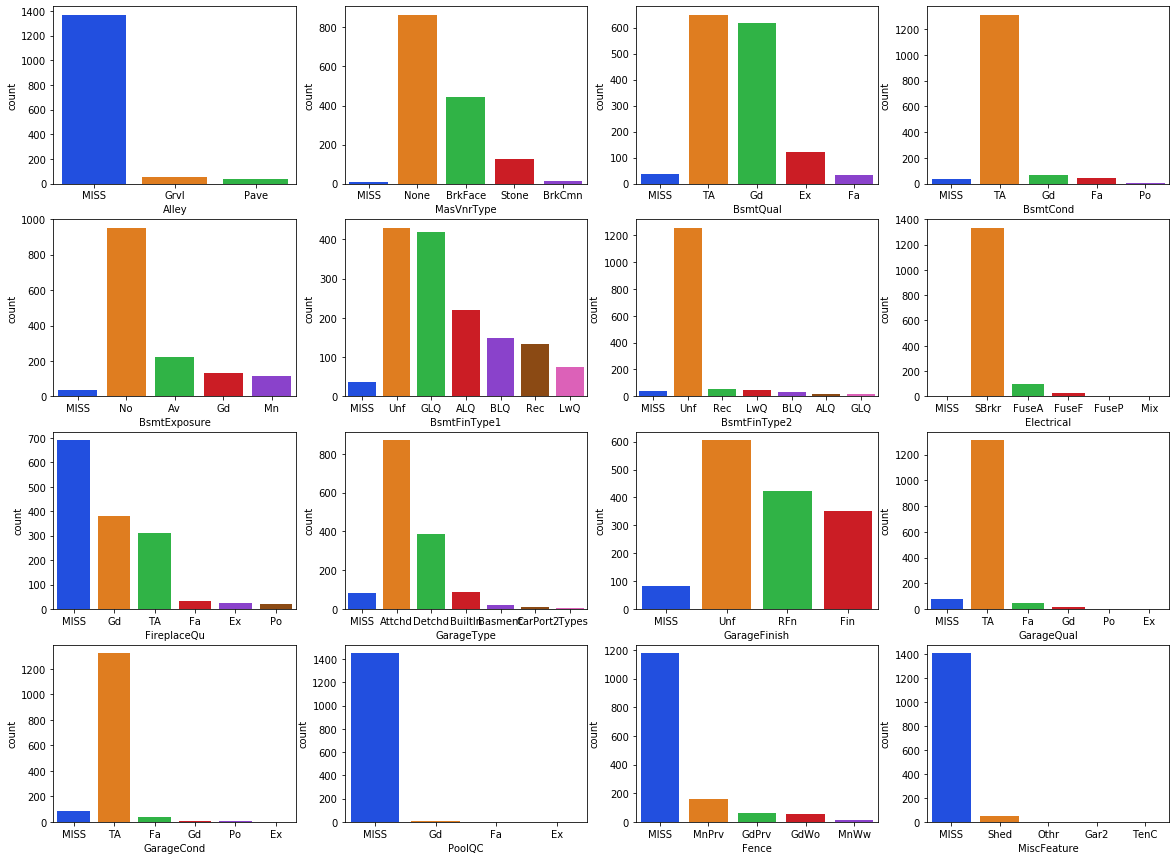

In [183]:
f, ax = plt.subplots(4, 4, figsize=(20, 15))
       
for i in range(4):
    for j in range(4):
        sns.countplot(data[cat_with_nans[j+4*i]], ax=ax[i,j], palette = "bright", 
                      order = data[cat_with_nans[j+4*i]].value_counts().index.drop("MISS").insert(0, 'MISS'))
        sns.countplot(data[cat_with_nans[j+4*i]], ax=ax[i,j], palette = "bright", 
                      order = data[cat_with_nans[j+4*i]].value_counts().index.drop("MISS").insert(0, 'MISS'))
plt.show()

## Numerical Values

#### We want to get the names of columns with numerical data and find out which of these columns contain NaN values.

In [184]:
num_cols = [cname for cname in data.columns if data[cname].dtype == "float64" or data[cname].dtype == "int64"]
num_with_nans = [cname for cname in num_cols if data[cname].isnull().any()]
print('there are', len(num_with_nans), 'columns with missing numerical data:', num_with_nans)

print(round(len(num_with_nans)*100/len(num_cols),1), 'percent of numerical columns have missing data')

there are 3 columns with missing numerical data: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
8.1 percent of numerical columns have missing data


In [185]:
# Replace all numerical values with "Values" and all NaN values with "Miss"
data.LotFrontage.where(data.LotFrontage.isnull(), "Value", inplace=True)
data.MasVnrArea.where(data.MasVnrArea.isnull(), "Value", inplace=True)
data.GarageYrBlt.where(data.GarageYrBlt.isnull(), "Value", inplace=True)
data[num_with_nans] = data[num_with_nans].fillna("MISS")

In [186]:
miss = 0
val = 0

for i in num_with_nans:
    miss += data[i].value_counts().MISS
    val += data[i].value_counts().Value
    
print(round(miss*100/val,1), 'percent of data is missing from the three numerical columns with NaNs')

8.6 percent of data is missing from the three numerical columns with NaNs


#### Here is a plot where we see that most numerical data in our columns is not missing:

1. 8.1% of numerical columns have missing data
2. Of these columns with missing data, only 8.6% of data is missing

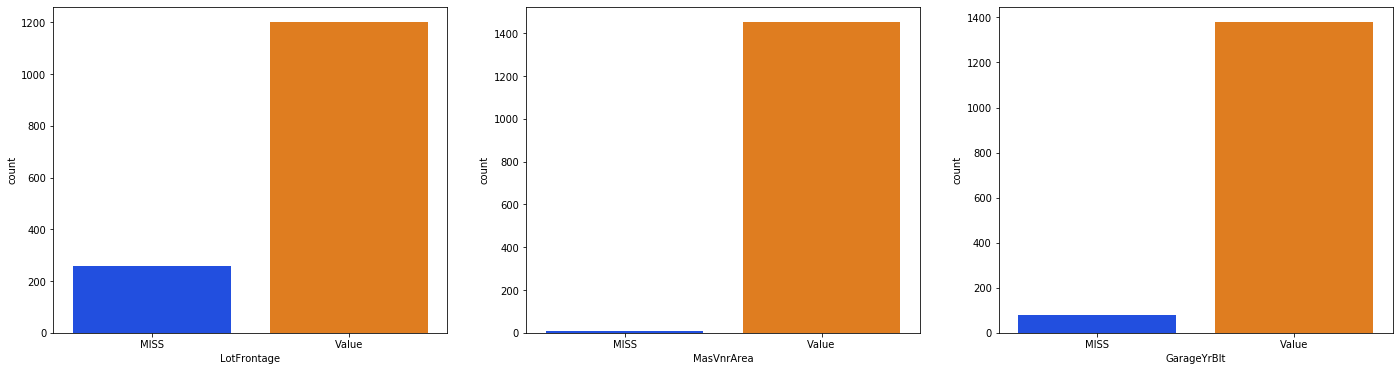

In [14]:
f, ax = plt.subplots(1, 3, figsize=(24, 6))
       
for j in range(3):
    sns.countplot(data[num_with_nans[j]], ax=ax[j], palette = "bright", 
                  order = data[num_with_nans[j]].value_counts().index.drop("MISS").insert(0, 'MISS'))
plt.show()

# Graphs

**Our goal is to observe correlations between different features and a column named "SalePrice", which indicates the price of a house sold. We have 79 features and it is impossible to make a vis for each find to find if the correlations exist or if it could be dropped, but we can focus on some. It maked sense to look at features with missing data and decide if it is reasonable to drop it or to impute values.**

In [190]:
# we load the dataset again to get back the original values (with NaNs)
data = pd.read_csv('./ames_housing_train.csv', index_col='Id') 

93.8 percent of data in this column is missing


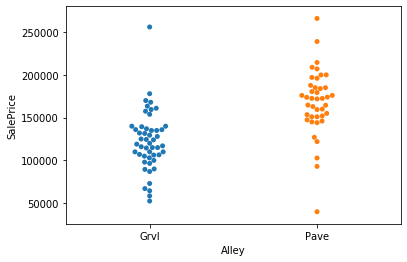

In [61]:
sns.swarmplot(x=data['Alley'], y=data['SalePrice'])

alley_nulls = data["Alley"].isnull().sum()
alley_vals = data["Alley"].value_counts().sum()

print(round(100*alley_nulls/(alley_nulls + alley_vals),1), 'percent of data in this column is missing')

Here we see that the price of a house with a paved alley is slightly higher. But since missing data accounts for 93.8% of all entries in this column, in further analysis we would just drop this feature from the training set.

0.0 percent of data in this column is missing


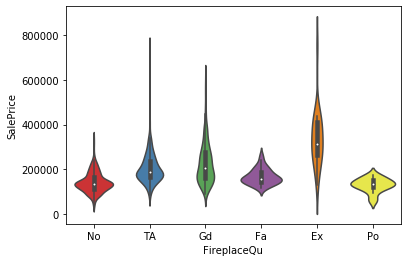

In [70]:
sns.violinplot(x='FireplaceQu',y='SalePrice',data=data,palette='Set1')

fire_nulls = data["FireplaceQu"].isnull().sum()
fire_vals = data["FireplaceQu"].value_counts().sum()

print(round(100*fire_nulls/(fire_nulls + fire_vals),1), 'percent of data in this column is missing')

In column "FireplaceQu" (Fireplace Quality) we have 47.3% of entries missing. However, here the missing values mean that there is no fireplace in the house, so we can replace NaN with entry "No".

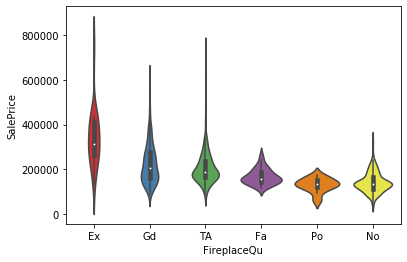

In [66]:
data['FireplaceQu'].fillna("No", inplace = True)
sns.violinplot(x='FireplaceQu',y='SalePrice',data=data, palette='Set1', order = ["Ex", "Gd", "TA", "Fa", "Po", "No"])

The x axis of above graph has been ordered as "Excellent", "Good", "Average", "Fair", "Poor", "No". This makes perfect sense, houses with no or poor quality fireplaces cost less than houses with an excellent ones.

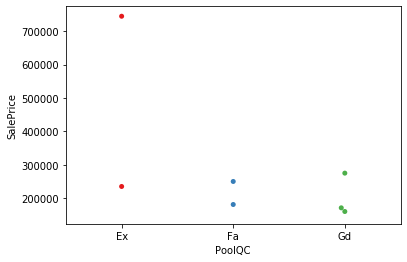

In [75]:
sns.swarmplot(x='PoolQC', y='SalePrice', data=data, palette='Set1')

In column 'pool quality', NaN also means "No Pool", but since we have only 7 datapoints for pool quality of houses with pools, it is better to simply drop the feature and not use it to train the model.

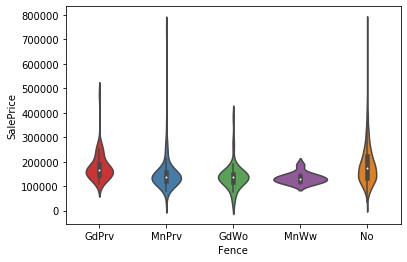

In [78]:
data['Fence'].fillna("No", inplace = True)
sns.violinplot(x='Fence', y='SalePrice', data=data, palette='Set1', order = ["GdPrv", "MnPrv", "GdWo", "MnWw", "No"])

Here, NaN values mean "No Fence" and we replace NaNs with this value. We order the x axis as "Good Privacy", "Minimum Privacy", "Good Wood", "Minimum Wood/Wire", "No Fence".

We have a lot of missing values in column "Miscellaneous Feature", namely 96.3% and we do not now exactly which features the correspond to, as well as have to little data for features like "Tennis Court" and "2nd garage", it is better to just drop the feature from the dataset.

96.3 percent of data in this column is missing


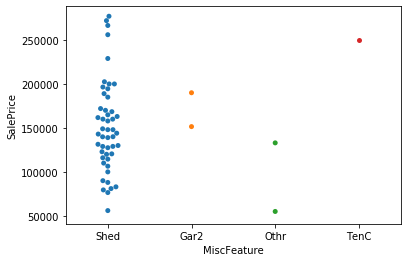

In [82]:
sns.swarmplot(x=data['MiscFeature'], y=data['SalePrice'])

misc_nulls = data["MiscFeature"].isnull().sum()
misc_vals = data["MiscFeature"].value_counts().sum()

print(round(100*misc_nulls/(misc_nulls + misc_vals),1), 'percent of data in this column is missing')

**Garages**
We have 81 values missing in all columns, which indicate garages. By checking the data description it becomes clear, that we have missing values, because some of the houses don't have garages. So we replace NaNs in some columns with "No".

- 'Garage Quality' and 'Garage Condition' basically mean the same thing and this can be well seen in the plots below. We'll be keeping one one of the features.

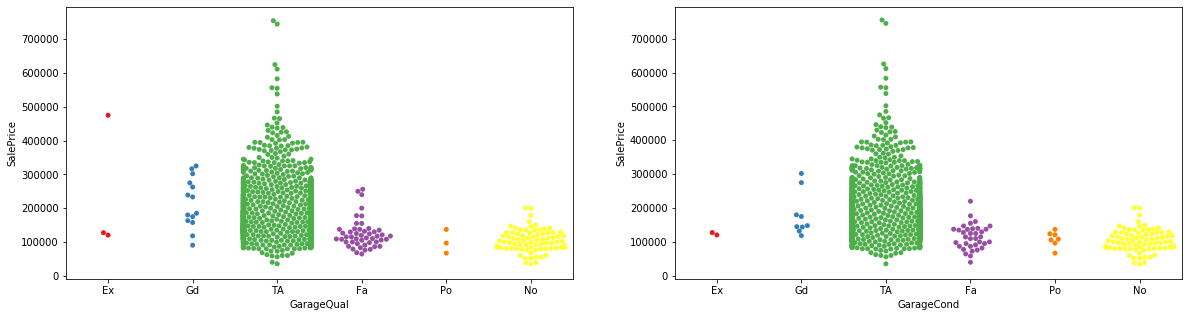

In [198]:
f, ax = plt.subplots(1, 2, figsize=(20, 5))

data['GarageQual'].fillna("No", inplace = True)
data['GarageCond'].fillna("No", inplace = True)
sns.swarmplot(x='GarageQual',y='SalePrice',data=data, palette='Set1', 
              order = ['Ex', "Gd", 'TA', 'Fa', 'Po', 'No'], ax = ax[0])
sns.swarmplot(x='GarageCond',y='SalePrice',data=data, palette='Set1', 
              order = ['Ex', "Gd", 'TA', 'Fa', 'Po', 'No'], ax = ax[1])

*A small spinoff: while checking the garage-features we notice that 'GarageCars' and 'GarageArea' also might refer to the same thing, namely the garage capacity. When we compare the plots we see that it is true, so we only keep one of the features.*

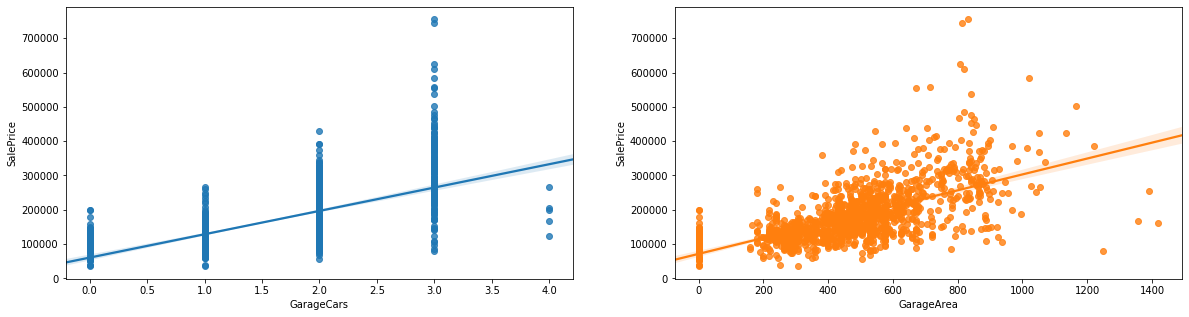

In [200]:
f, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.regplot(x=data['GarageCars'], y=data['SalePrice'], ax=ax[0])
sns.regplot(x=data['GarageArea'], y=data['SalePrice'], ax=ax[1])

With 'GarageYrBlt' it is difficult to guess which values can be imputed, so it is better to just remove the column altogether. We keep the columns 'GarageType' and 'GarageFinish' but replace NaNs with "No"s.

In [202]:
data['GarageType'].fillna("No", inplace = True)
data['GarageFinish'].fillna("No", inplace = True)

We also have some features for Basement, which have missing values. Here it also means that the property has no basement, so we replace NaNs with "No"s.

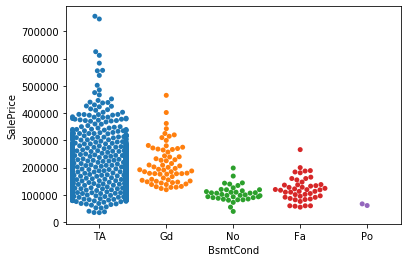

In [204]:
data['BsmtCond'].fillna("No", inplace = True)
data['BsmtQual'].fillna("No", inplace = True)
data['BsmtExposure'].fillna("No", inplace = True)
data['BsmtFinType1'].fillna("No", inplace = True)
data['BsmtFinType2'].fillna("No", inplace = True)

Veneer features. Here, in 'MasVnrType' we see that we have "None" values along with 8 NaNs. Could it mean the same thing? We can check that. We would expect all "None"-type veneers to have an area of 0. This is not entirely true, which I don't have an answer for. Still, it seems most reasonable to replace NaNs in 'MasVnrType' with "None" and NaNs in 'MasVnrArea' with 0s.

0.0      859
1.0        2
312.0      1
344.0      1
288.0      1
Name: MasVnrArea, dtype: int64


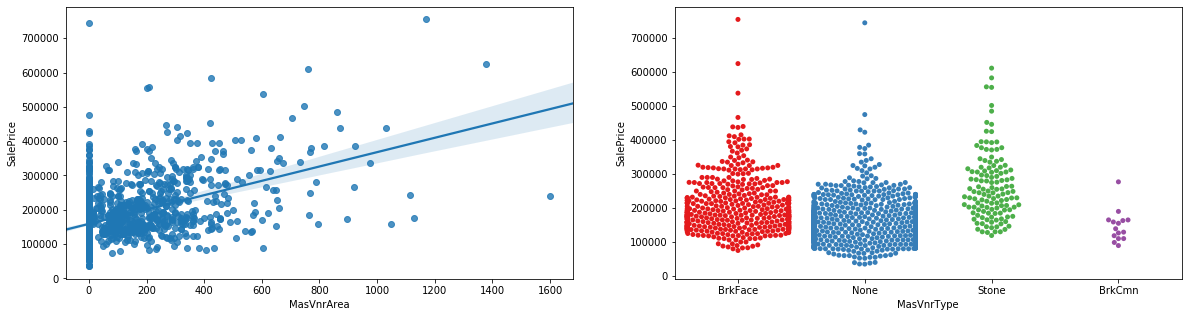

In [239]:
f, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.regplot(x=data['MasVnrArea'], y=data['SalePrice'], ax = ax[0])
sns.swarmplot(x='MasVnrType',y='SalePrice',data=data, palette='Set1', ax = ax[1])

indicies = data.index[data['MasVnrType'] == 'None']
print(data.loc[indicies]['MasVnrArea'].value_counts())

data['MasVnrType'].fillna("None", inplace = True)
data['MasVnrArea'].fillna(0, inplace = True)

The only feature with missing values, which we havent discussed yet is 'LotFrontage', linear feet of street connected to property. If we visualize the data, we see that most data points form a cluster and from its shape we cannot directly infer linear (or any other) dependency. The error of the linear regression fit is large and we are going to drop this feature altogether, instead of imputing any values for almost 20% of this data.

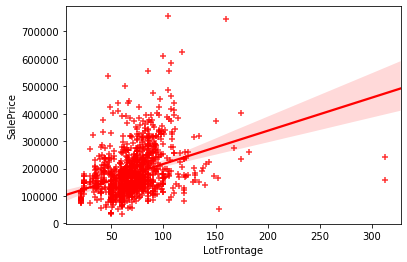

In [246]:
sns.regplot(x=data['LotFrontage'], y=data['SalePrice'], color = 'red', marker = "+")

**Based on what we have seen, we will be:**
- Removing columns: 'PoolQC', 'MiscFeature', 'Alley', 'GarageQual', 'GarageCars', 'GarageYrBlt', 'LotFrontage'.
- Removing a row with NaN value in 'Electrical'

## Relevant Features

"Irrelevant or partially relevant features can negatively impact model performance". So it is our job to filter them out.

In [162]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesRegressor

In [163]:
X = pd.read_csv('./ames_housing_train.csv', index_col='Id') 
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

In [164]:
# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.75, test_size=0.25,
                                                                random_state=0)

In [165]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()


# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)

X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)

# Save the column names
X_train_copy = X_train.copy()
X_valid_copy = X_valid.copy()

In [166]:
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
miss_cols = X_train.columns[X_train.isnull().any()]

LotFrontage    199
MasVnrArea       5
GarageYrBlt     56
dtype: int64


In [167]:
my_imputer = SimpleImputer(strategy = 'median')

X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Fill in the lines below: imputation removed column names; put them back
X_train.columns = X_train_copy.columns
X_valid.columns = X_valid_copy.columns

Text(0.5, 1.0, 'Feature Importance')

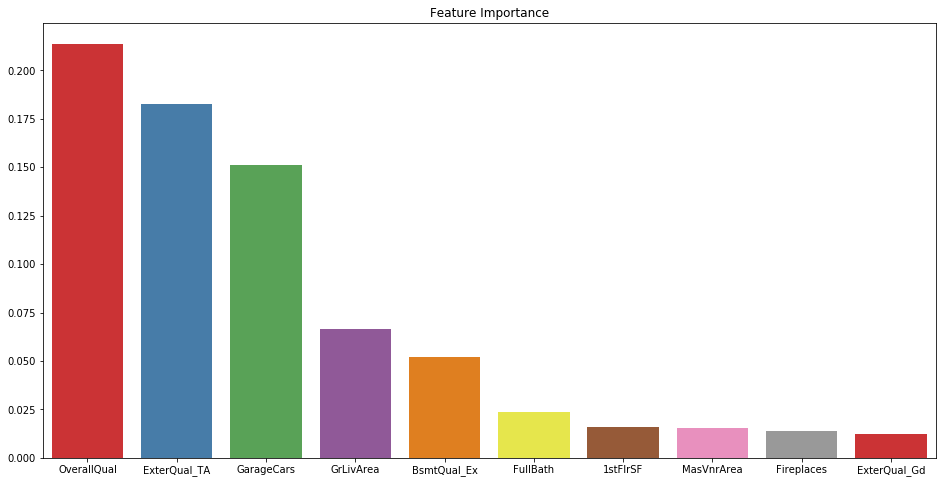

In [172]:
#create a classifer for feature selection
forest  = ExtraTreesRegressor(n_estimators = 100)
forest = forest.fit(X_train, y_train)
importance_table = pd.Series(forest.feature_importances_, index=X_train.columns)
importance_table = importance_table.sort_values(ascending = False)

plt.figure(figsize=(16,8))
ax = sns.barplot(x = importance_table.index[:10], y = importance_table.values[:10], palette="Set1")
ax.set_title('Feature Importance')